### The SORCE spacecraft makes daily Total-Solar-Irradiance (TSI) measurements.  Let's plot the data, and tell Matlab to smooth the data.

In [1]:
import matlab.engine
import numpy as np
import os
import matplotlib.pyplot as plt

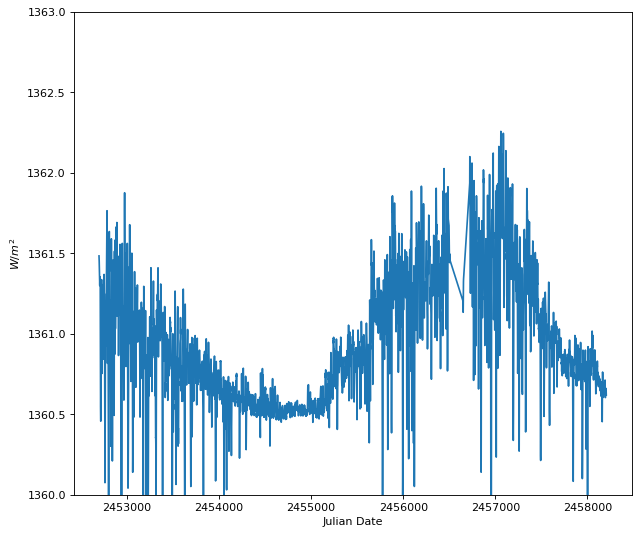

In [3]:
# Open and plot the data
my_data = np.genfromtxt('data' + os.sep + 'sorce_tsi.txt', delimiter=',')
    
time = my_data[:,0]
tsi = my_data[:,1]
w = np.where( tsi > 0)
tsi = tsi[w]
time = time[w]

fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(time, tsi)
plt.ylim((1360,1363))
plt.ylabel('$W/m^2$')
plt.xlabel('Julian Date')
plt.show()


In [4]:
# Now, call your favorite smoothing function
eng = matlab.engine.start_matlab()
windowSize = 100; 
b = (1/windowSize)* np.ones((1,windowSize), np.double)
b = matlab.double(b.tolist())
a = 1;
smooth_tsi = eng.filter(b,a,matlab.double(tsi.tolist()));
smooth_tsi = np.array(smooth_tsi._data.tolist()).reshape(time.size)
eng.exit()

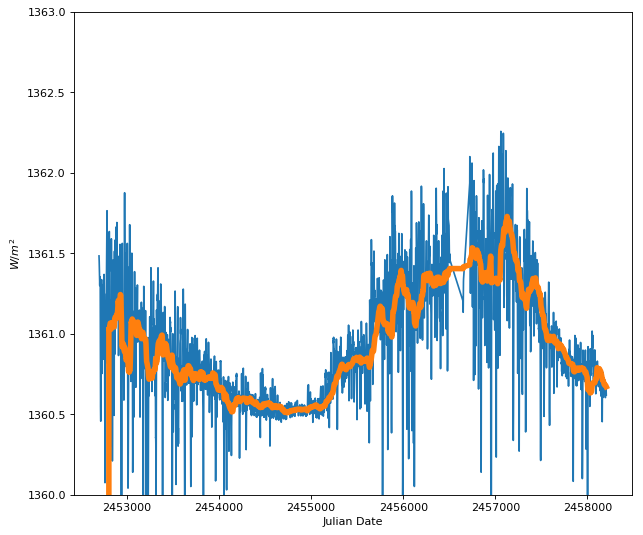

In [5]:
# Plot again, this time with the smoothed data overplotted
fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(time, tsi)
plt.plot(time, smooth_tsi, linewidth=5)
plt.ylim((1360,1363))
plt.ylabel('$W/m^2$')
plt.xlabel('Julian Date')
plt.show()